

```
# This is formatted as code
```

##Number of sales prediction with Gradient Boosting

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
data=pd.read_csv('Financials.csv')

In [78]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [79]:
data.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [81]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [82]:
data.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [83]:
data=data.rename(columns= {
                      'Segment': 'segment',
    'Country': 'country',
    ' Product ': 'product',
    ' Discount Band ': 'discount_band',
    ' Units Sold ': 'units_sold',
    ' Manufacturing Price ': 'manufacturing_price',
    ' Sale Price ': 'sale_price',
    ' Gross Sales ': 'gross_sales',
    ' Discounts ': 'discounts',
    '  Sales ': 'sales',
    ' COGS ': 'gogs',
    ' Profit ': 'profit',
    'Date': 'date',
    'Month Number': 'month_number',
    ' Month Name ': 'month_name',
    'Year': 'year'
})

In [84]:
data.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,gogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [85]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [86]:
data.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,gogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [87]:
toFormat = [ "units_sold", "manufacturing_price", "sale_price", "gross_sales","gogs" ,"discounts",
           "sales", "profit"]

for column in toFormat:
    if column in data.columns:
        # Remove unwanted characters and replace non-numeric values with NaN
        data[column] = (
            data[column]
            .replace({'\$': '', ',': '', '-': '', ' ': ''}, regex=True)
            .apply(lambda x: pd.to_numeric(x, errors='coerce'))
        )
    else:
        print(f"Column {column} not found in the DataFrame.")

In [88]:
data.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,gogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              700 non-null    object 
 1   country              700 non-null    object 
 2   product              700 non-null    object 
 3   discount_band        700 non-null    object 
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    float64
 6   sale_price           700 non-null    float64
 7   gross_sales          700 non-null    float64
 8   discounts            647 non-null    float64
 9   sales                700 non-null    float64
 10  gogs                 700 non-null    float64
 11  profit               637 non-null    float64
 12  date                 700 non-null    object 
 13  month_number         700 non-null    int64  
 14  month_name           700 non-null    object 
 15  year                 700 non-null    int

In [90]:
from sklearn.preprocessing import MinMaxScaler
columns=[ 'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
    'discounts', 'sales', 'gogs', 'profit']
scaler= MinMaxScaler()
data[columns]=scaler.fit_transform(data[columns])

In [91]:
data = data.drop(columns=['month_name', 'year'])

In [92]:
data['date'] = pd.to_datetime(data['date'])

In [93]:
data.fillna(data['profit'].mean(), inplace=True)
data.fillna(data['discounts'].mean(), inplace=True)

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['segment']=le.fit_transform(data['segment'])

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lanel=['country','product','discount_band']
for i in lanel:
  data[i]=le.fit_transform(data[i])

In [96]:
data

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,gogs,profit,date,month_number
0,2,0,1,3,0.330460,0.000000,0.037901,0.025355,0.104826,0.026535,0.016075,0.060705,2014-01-01,1
1,2,2,1,3,0.261153,0.000000,0.037901,0.020420,0.104826,0.021394,0.012943,0.049346,2014-01-01,1
2,3,1,1,3,0.460804,0.000000,0.023324,0.025604,0.104826,0.026794,0.021967,0.040488,2014-01-06,6
3,3,2,1,3,0.160280,0.000000,0.023324,0.009555,0.104826,0.010077,0.008384,0.015862,2014-01-06,6
4,3,3,1,3,0.528829,0.000000,0.023324,0.029237,0.104826,0.030578,0.025041,0.046062,2014-01-06,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,4,1,0,0,0.529994,1.000000,0.854227,0.614332,0.744068,0.543797,0.650550,0.046158,2014-01-03,3
696,4,3,0,0,0.080606,1.000000,0.854227,0.134362,0.164050,0.118851,0.142762,0.009333,2014-01-10,10
697,2,3,2,0,0.272103,0.007782,0.000000,0.006450,0.009475,0.005602,0.006236,0.003871,2014-01-02,2
698,2,0,3,0,0.121840,0.027237,0.000000,0.002705,0.004950,0.002287,0.002840,0.001532,2014-01-04,4


<Axes: >

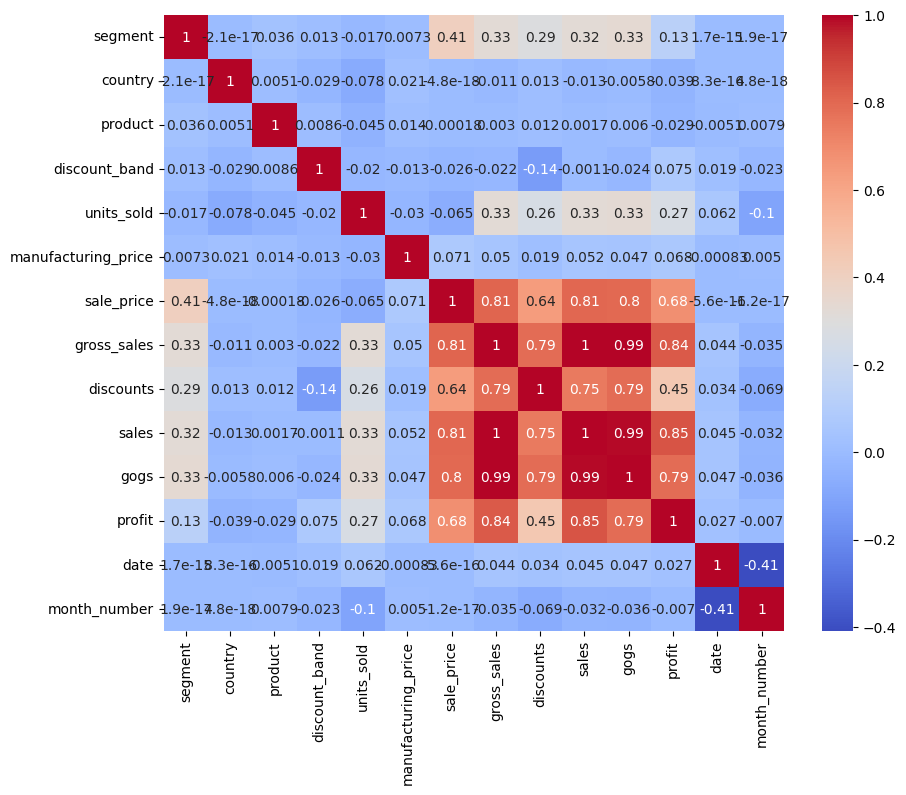

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

<Axes: >

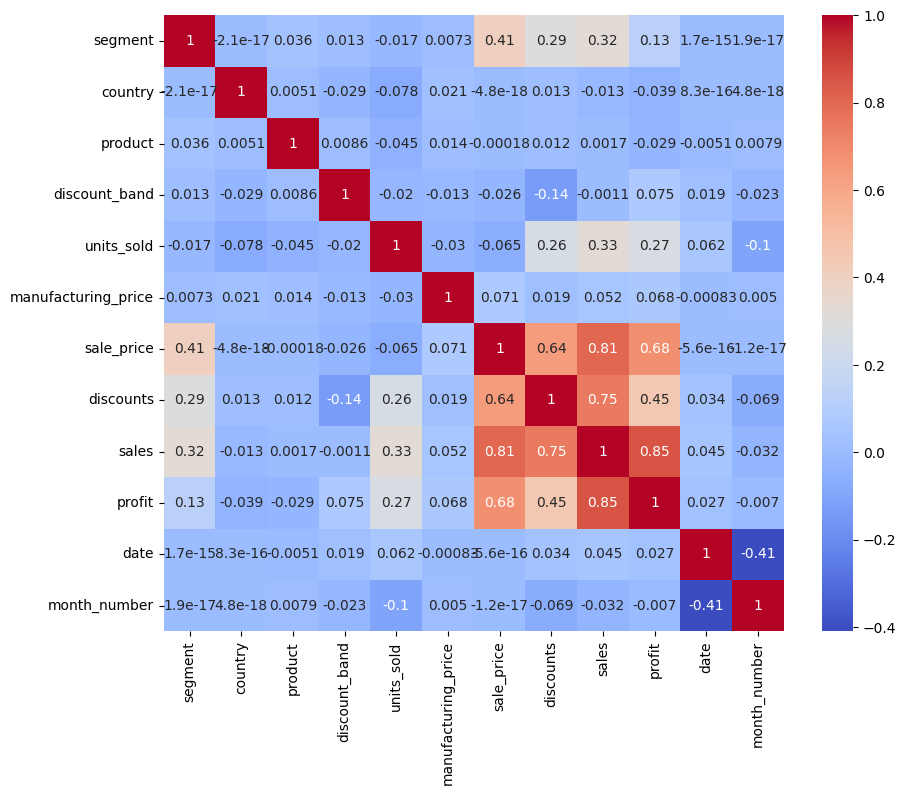

In [98]:
data=data.drop(columns=['gogs'])
data=data.drop(columns=['gross_sales'])
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [106]:
X=data.drop(columns=['units_sold'])
y=data['units_sold']


In [107]:
data['date'] = data['date'].astype('int64') // 10**9  # Convert to seconds since epoch

In [111]:
from sklearn.model_selection import train_test_split
def classify(model, X, y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

  model.fit(X_train, y_train)
  print('Accuracy:', model.score(X_test,y_test)*100)

  score=cross_val_score(model,X,y,cv=5)
  print('Cross Validation Score:',np.mean(score)*100)

In [113]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
classify(model,X,y)

Accuracy: 48.258725427462956
Cross Validation Score: 40.46384940171451
